# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers-and-lambda/4" data-toc-modified-id="Malus-with-two-polarizers-and-lambda/4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers and $\lambda/4$</a></div><div class="lev3 toc-item"><a href="#Motors-definition" data-toc-modified-id="Motors-definition-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Motors definition</a></div><div class="lev3 toc-item"><a href="#Labjack-definition" data-toc-modified-id="Labjack-definition-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Labjack definition</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Experiments</a></div><div class="lev3 toc-item"><a href="#Linear-polarized-parallel" data-toc-modified-id="Linear-polarized-parallel-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear polarized parallel</a></div><div class="lev3 toc-item"><a href="#Linear-polarized-crossed" data-toc-modified-id="Linear-polarized-crossed-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Linear polarized crossed</a></div><div class="lev3 toc-item"><a href="#Linear-polarized-45" data-toc-modified-id="Linear-polarized-45-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Linear polarized 45</a></div><div class="lev2 toc-item"><a href="#Final:-Close" data-toc-modified-id="Final:-Close-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Final: Close</a></div>

# Malus with two polarizers and $\lambda/4$

Author: Luis Miguel Sanchez Brea

Date:   19/02/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 329 mA) 60 db
We have lens for collimating and Thorlabs DG10-600-B diffuser and a sheet of paper

We have polarizer 1 Thorlabs LPNIRE100-B
We have polarizer 4 Thorlabs LPNIRE100-B
We have $\lambda/4$ Thorlabs WPQ10E-850-SP at motor 2

Polarizer 1 is placed at 0º, arbitrarily
Polarizer 4 is placed at 70.496º for pass light (aligned to polarizer 1)

We rotate $\lambda/4$ (motor 2 )

We rotate waveplate (motor 2) in order to determine the polarization parameters of WPQ10E-850-SP. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

**objective** 
In this notebook we only determine the experimental intensity distribution for post-analysis

In [10]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

70.445
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

### Motors definition

In [16]:
from polarimeter.motors.rotary_motors import Motors
from polarimeter import config_parameters
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

In [13]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Cannot connect to COM 3, 115200 Baud
GCS ERROR -9: There is no interface or DLL handle with the given ID


NameError: global name 'exit' is not defined

### Labjack definition

In [5]:
import u3
import LabJackPython

V=1.
mV=V/1000

def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [6]:
# loads labjack
d=u3.U3()

In [7]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [14]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


0.63061068696


In [15]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.5f}".format(ainValue), end=', ')
    return ainValue

## Experiments
### Linear polarized parallel

In [17]:
motor_1_max=0
motor_4_max=config_parameters[3]['theta_axis']
motor_4_min=config_parameters[3]['theta_axis']+90

# Move motor 1 to maximum position of laser diode
Vels=[50,50,50,50]

motors.move(
        positions=[motor_1_max, 0, 0, motor_4_max], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([ 0.], [ 0.], [ 0.], [ 70.444])
0.81482, 

0.8148171578068286

In [18]:
num_data=90
positions=sp.linspace(0,360,num_data)
intensities_parallel=sp.zeros_like(positions,dtype=float)

In [19]:
for i, position_2 in enumerate(positions):
    motors.move(
        positions=[motor_1_max, position_2, 0, motor_4_max], velocities=Vels, verbose=False)
    intensities_parallel[i]=get_intensity(verbose=True)

0.81482, 0.83017, 0.87110, 0.92739, 1.00414, 1.09624, 1.17811, 1.26510, 1.33162, 1.38790, 1.42884, 1.43907, 1.42884, 1.38790, 1.33674, 1.26510, 1.18323, 1.09624, 1.00926, 0.93762, 0.88134, 0.84552, 0.83017, 0.83528, 0.86599, 0.92227, 0.98879, 1.07066, 1.15765, 1.23952, 1.31115, 1.37255, 1.40837, 1.43396, 1.41861, 1.38279, 1.33674, 1.26510, 1.18323, 1.10136, 1.01949, 0.93762, 0.87622, 0.83528, 0.81482, 0.81993, 0.85064, 0.89669, 0.96321, 1.03996, 1.13718, 1.21393, 1.29580, 1.35720, 1.40837, 1.43396, 1.43396, 1.40837, 1.36232, 1.29580, 1.21905, 1.13718, 1.05019, 0.96832, 0.90180, 0.85575, 0.82505, 0.81993, 0.84552, 0.88645, 0.94786, 1.02461, 1.10648, 1.19346, 1.27022, 1.34185, 1.38279, 1.42372, 1.42372, 1.40837, 1.36232, 1.30092, 1.22416, 1.13718, 1.05019, 0.97344, 0.90692, 0.85575, 0.81993, 0.81482, 

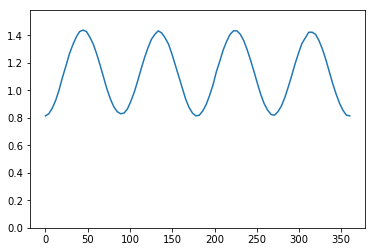

In [20]:
plt.figure()
plt.plot(positions, intensities_parallel)
plt.ylim(0,intensities_parallel.max()*1.1)
plt.savefig('intensities_parallel.pdf')

In [21]:
np.save('I_parallel_180219.npy', np.array([positions, intensities_parallel]).transpose())
np.savetxt('I_parallel_180219.txt',  np.array([positions, intensities_parallel]).transpose())

### Linear polarized crossed

In [22]:
num_data=90
positions=sp.linspace(0,360,num_data)
intensities_crossed=sp.zeros_like(positions,dtype=float)

In [23]:
for i, position_2 in enumerate(positions):
    motors.move(
        positions=[motor_1_max, position_2, 0, motor_4_min], velocities=Vels, verbose=False)
    intensities_crossed[i]=get_intensity(verbose=True)

0.65619, 0.63573, 0.59991, 0.53851, 0.47199, 0.38500, 0.30313, 0.22638, 0.14963, 0.09846, 0.06264, 0.05241, 0.06264, 0.09846, 0.15474, 0.23150, 0.30825, 0.39012, 0.47711, 0.54874, 0.60503, 0.64084, 0.65619, 0.64596, 0.61526, 0.56921, 0.49757, 0.41059, 0.32872, 0.24685, 0.17521, 0.11893, 0.06776, 0.05241, 0.06264, 0.08822, 0.13939, 0.20591, 0.28267, 0.36453, 0.45664, 0.52827, 0.58968, 0.63061, 0.64596, 0.64596, 0.62038, 0.57433, 0.50781, 0.43617, 0.34407, 0.26220, 0.18545, 0.12404, 0.07799, 0.05752, 0.05752, 0.07799, 0.12916, 0.19056, 0.26731, 0.34918, 0.43617, 0.51804, 0.58456, 0.62549, 0.65108, 0.65619, 0.63573, 0.59479, 0.53339, 0.45664, 0.36965, 0.28267, 0.20591, 0.13939, 0.08822, 0.06264, 0.05752, 0.06776, 0.11381, 0.17521, 0.24685, 0.32872, 0.41059, 0.49246, 0.55897, 0.61526, 0.64084, 0.65108, 

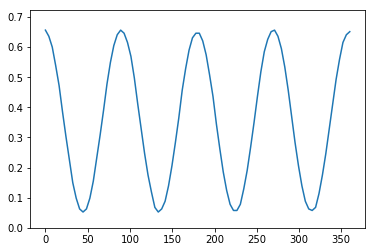

In [24]:
plt.figure()
plt.plot(positions, intensities_crossed)
plt.ylim(0,intensities_crossed.max()*1.1)
plt.savefig('intensities_crossed.pdf')

In [25]:
np.save('I_crossed_180219.npy', np.array([positions, intensities_crossed]).transpose())
np.savetxt('I_crossed_180219.txt',np.array([positions, intensities_crossed]).transpose())

### Linear polarized 45

In [26]:
num_data=90
positions=sp.linspace(0,360,num_data)
intensities_45=sp.zeros_like(positions,dtype=float)

In [27]:
for i, position_2 in enumerate(positions):
    motors.move(
        positions=[motor_1_max, position_2, 0, motor_4_min+45], velocities=Vels, verbose=False)
    intensities_45[i]=get_intensity(verbose=True)

0.67155, 0.58968, 0.51804, 0.46175, 0.42082, 0.40035, 0.40547, 0.44640, 0.49246, 0.56921, 0.65108, 0.74318, 0.83528, 0.91715, 0.98879, 1.03996, 1.07066, 1.08089, 1.06043, 1.01949, 0.95809, 0.88645, 0.80458, 0.71760, 0.63573, 0.56921, 0.51292, 0.48734, 0.47711, 0.49246, 0.52827, 0.57944, 0.64596, 0.72783, 0.80458, 0.87622, 0.93250, 0.97344, 1.00414, 1.00414, 0.97344, 0.92739, 0.87622, 0.79947, 0.71248, 0.63061, 0.55386, 0.48222, 0.43617, 0.40035, 0.40035, 0.42082, 0.46687, 0.52827, 0.60503, 0.69201, 0.78923, 0.87622, 0.95297, 1.01437, 1.05531, 1.07578, 1.06554, 1.03996, 0.98367, 0.92227, 0.84040, 0.75853, 0.67155, 0.59991, 0.53851, 0.49757, 0.47711, 0.47711, 0.50781, 0.54874, 0.61014, 0.68178, 0.76365, 0.84040, 0.90180, 0.95809, 0.98879, 1.00414, 0.99391, 0.95809, 0.90692, 0.83528, 0.75853, 0.67155, 

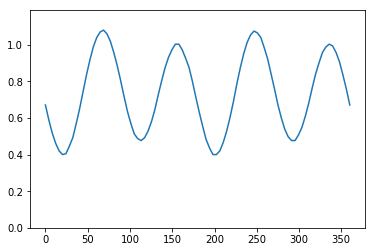

In [28]:
plt.figure()
plt.plot(positions, intensities_45)
plt.ylim(0,intensities_45.max()*1.1)
plt.savefig('intensities_45.pdf')

In [29]:
np.save('I_45_180219.npy', np.array([positions, intensities_45]).transpose())
np.savetxt('I_45_180219.txt', np.array([positions, intensities_45]).transpose() )

## Final: Close

In [26]:
motors.close()
del motors
LabJackPython.Close()